In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import classificationSummary, gainsChart
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster

In [2]:
%store -r X_train
%store -r y_train
%store -r X_valid
%store -r y_valid

## Data Splitting

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [4]:
print("Samples in training set(Oversampled): ",len(X_train))
print("Samples in testing set (Oversampled): ",len(X_test))
print("Samples in valid set (Unbalanced): ",len(X_valid))


Samples in training set(Oversampled):  19540
Samples in testing set (Oversampled):  4886
Samples in valid set (Unbalanced):  2662


## Confusion Matrix and Metrics Function

In [5]:
def confusionMatrices(model, title):
    print(title + ' - training results')
    #classificationSummary(y_train, model.predict(X_train))
    
    y_train_pred = model.predict(X_train)
    confusionMat = confusion_matrix(y_train, y_train_pred)
    
    acc = metrics.accuracy_score(y_train, y_train_pred)
    f1 = metrics.f1_score(y_train, y_train_pred)
    print("Accuracy Score: ",round(acc,3))
    print("F1 Score: ",round(f1,3))

    ax = sns.heatmap(confusionMat, annot=True, fmt='d',cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels for TRAINING data\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['No','Yes'])
    ax.yaxis.set_ticklabels(['No','Yes'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    print(title + ' - Test results')
    #classificationSummary(y_test, model.predict(X_test))
    
    y_pred = model.predict(X_test)
    testconfusionMat = confusion_matrix(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    print("Accuracy Score: ",round(acc,3))
    print("F1 Score: ",round(f1,3))
    
    ax = sns.heatmap(testconfusionMat, annot=True, fmt='d', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels for TESTING dataset\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['No','Yes'])
    ax.yaxis.set_ticklabels(['No','Yes'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    print(title + ' - Test results')
    #classificationSummary(y_test, model.predict(X_test))
    
    y_pred = model.predict(X_valid)
    testconfusionMat = confusion_matrix(y_valid, y_pred)
    
    acc = metrics.accuracy_score(y_valid, y_pred)
    f1 = metrics.f1_score(y_valid, y_pred)

    print("Accuracy Score: ",round(acc,3))
    print("F1 Score: ",round(f1,3))
    
    ax = sns.heatmap(testconfusionMat, annot=True, fmt='d', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels for VALIDATION dataset\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['No','Yes'])
    ax.yaxis.set_ticklabels(['No','Yes'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### K-Nearest Neighbors

Text(0, 0.5, 'SSE')

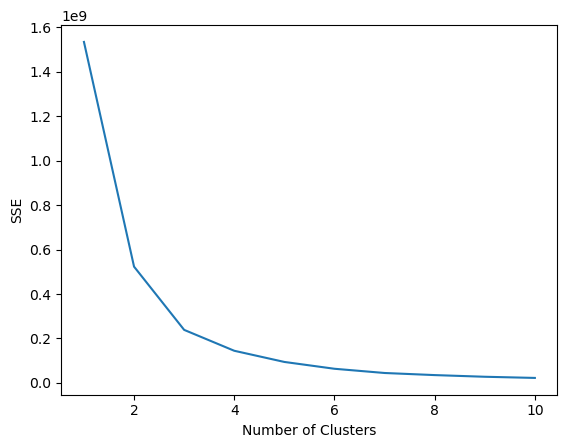

In [6]:
numClusters = range(1,11)
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X_train)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Logistic regression - training results
Accuracy Score:  0.905
F1 Score:  0.907


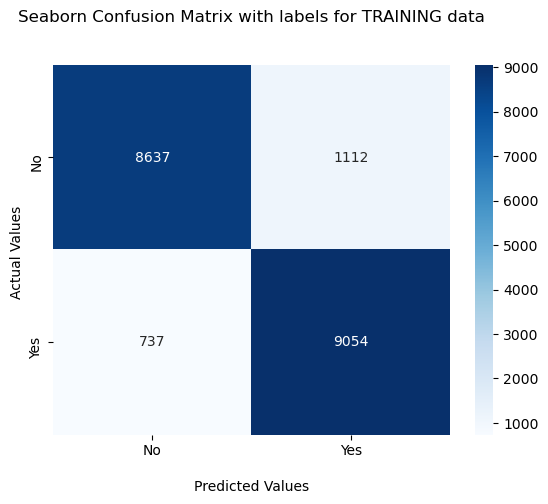

Logistic regression - Test results
Accuracy Score:  0.886
F1 Score:  0.889


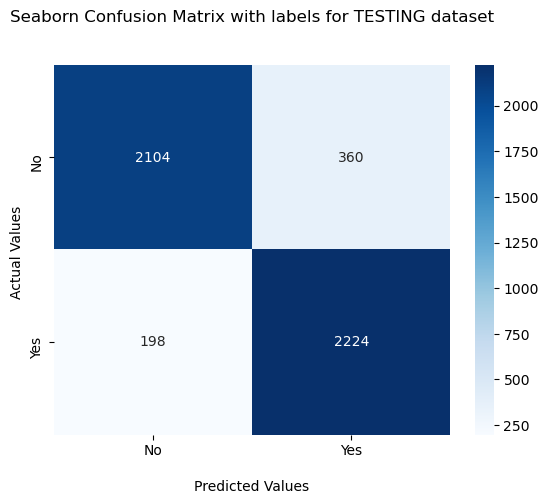

Logistic regression - Test results
Accuracy Score:  0.884
F1 Score:  0.577


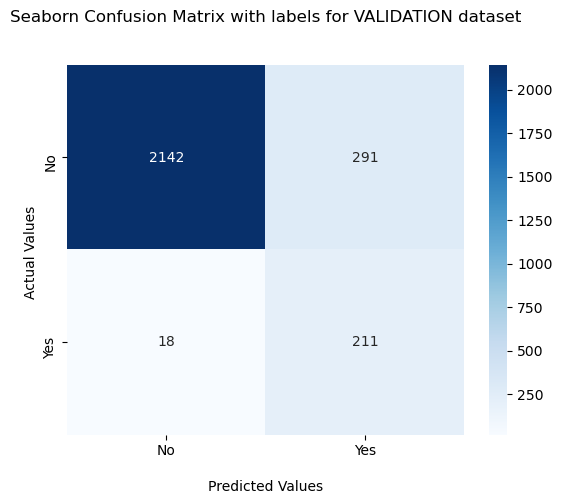

In [7]:
KNeighbors = KNeighborsClassifier(n_neighbors=3)
KNeighbors.fit(X_train,y_train) 
confusionMatrices(KNeighbors, 'Logistic regression')

### Logistic Regression

Logistic regression - training results
Accuracy Score:  0.826
F1 Score:  0.826


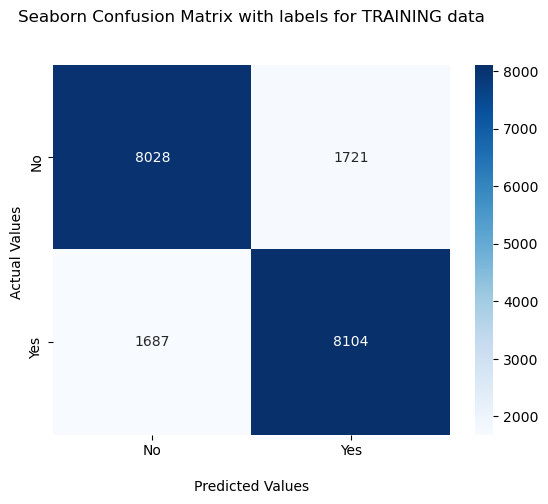

Logistic regression - Test results
Accuracy Score:  0.833
F1 Score:  0.831


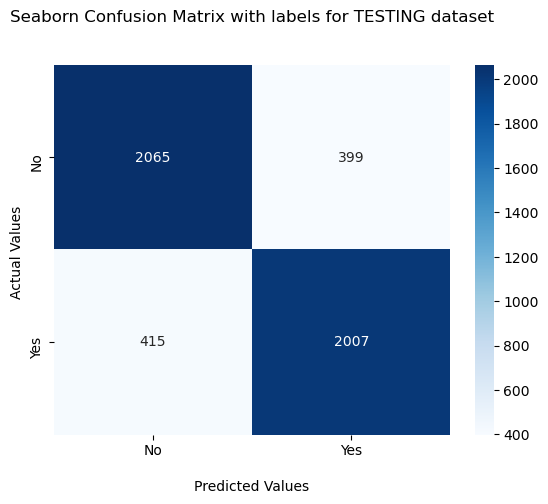

Logistic regression - Test results
Accuracy Score:  0.833
F1 Score:  0.471


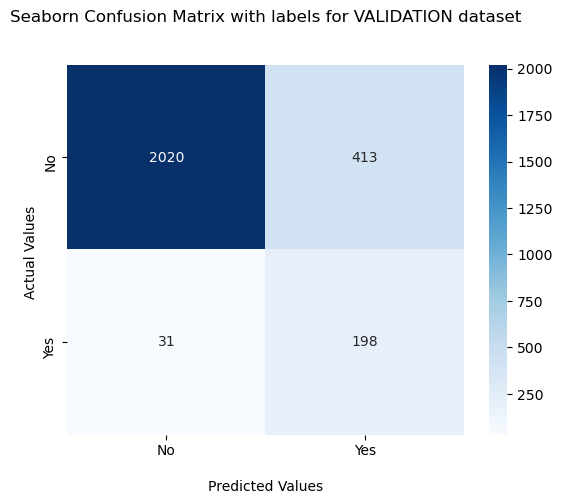

In [8]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train,y_train)
confusionMatrices(logit_reg, 'Logistic regression')

## Decision Trees

Initial score:  0.8850562947799385
Initial parameters:  {'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.8454452405322416
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 96}
Decision tree - training results
Accuracy Score:  0.859
F1 Score:  0.861


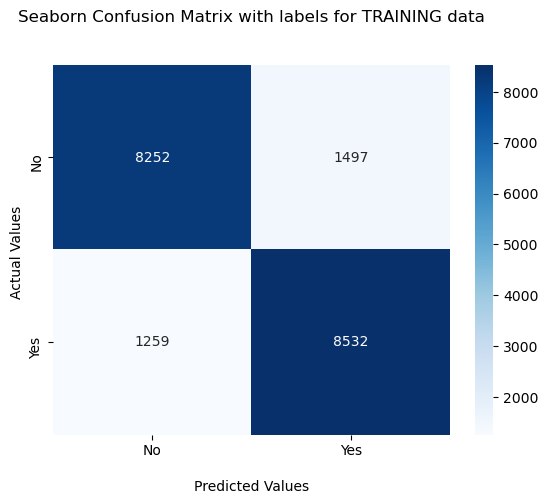

Decision tree - Test results
Accuracy Score:  0.851
F1 Score:  0.852


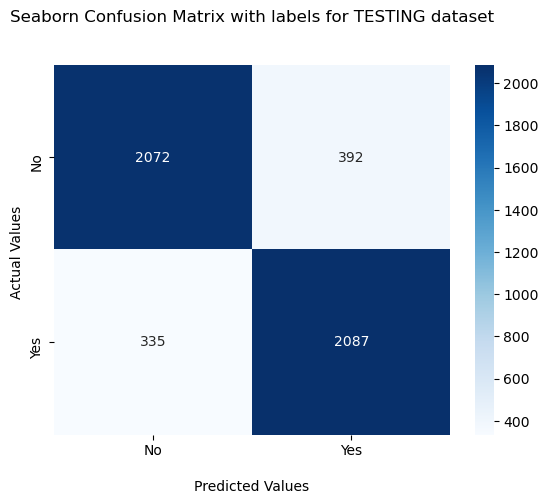

Decision tree - Test results
Accuracy Score:  0.848
F1 Score:  0.496


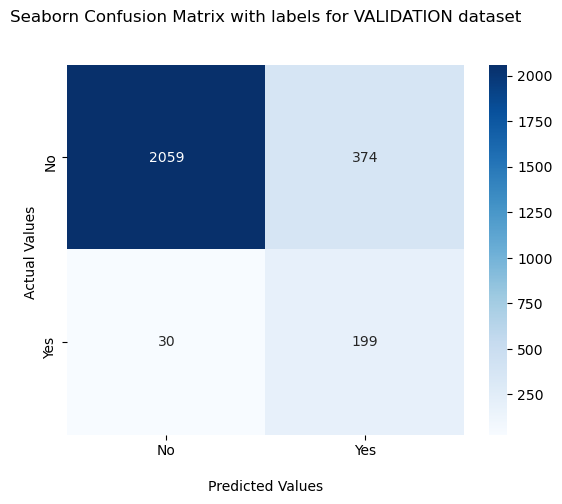

In [9]:
classTree = DecisionTreeClassifier()
classTree.fit(X_train, y_train)

# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': [96, 97, 98, 99, 100, 101, 102, 103], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

classTree = gridSearch.best_estimator_
confusionMatrices(classTree, 'Decision tree')

### Bagging Classifier

Bagged Decision tree - training results
Accuracy Score:  0.838
F1 Score:  0.84


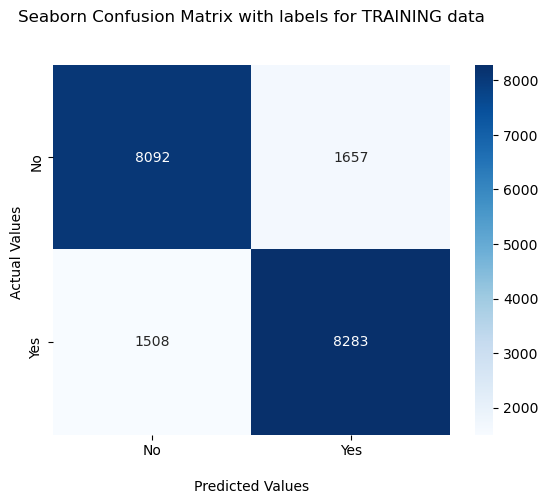

Bagged Decision tree - Test results
Accuracy Score:  0.843
F1 Score:  0.843


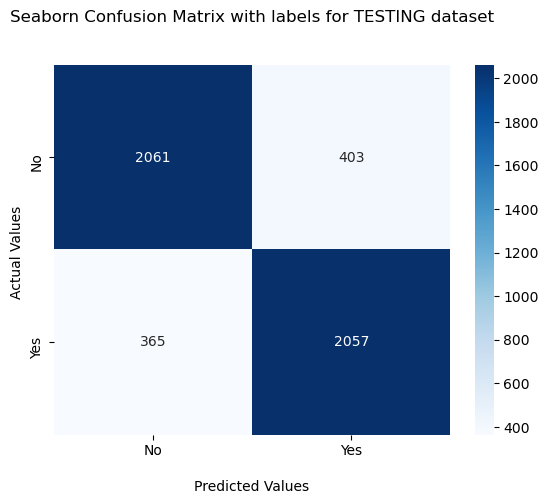

Bagged Decision tree - Test results
Accuracy Score:  0.838
F1 Score:  0.485


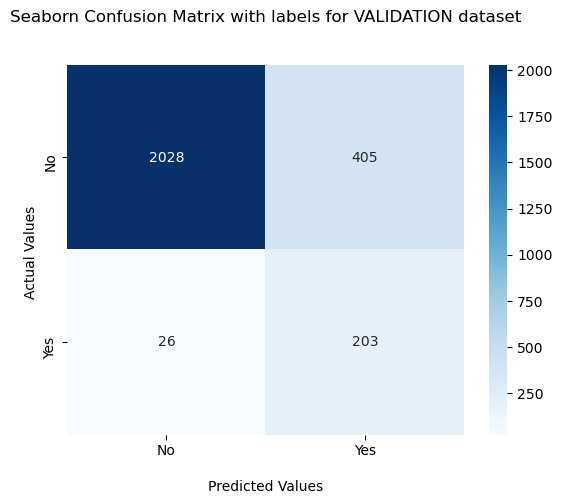

In [10]:
# we use the classification tree as the base estimator
bagging = BaggingClassifier(classTree, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
confusionMatrices(bagging, 'Bagged Decision tree')

### Adaboost

Boosted decision tree - training results
Accuracy Score:  0.938
F1 Score:  0.94


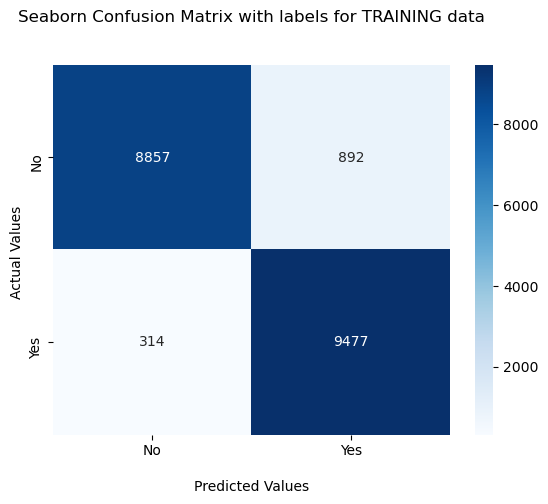

Boosted decision tree - Test results
Accuracy Score:  0.919
F1 Score:  0.922


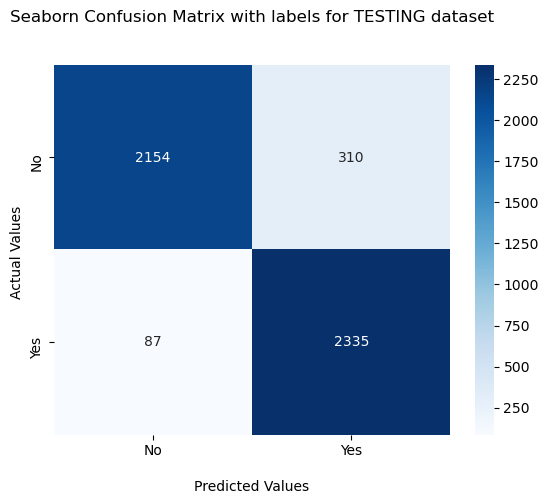

Boosted decision tree - Test results
Accuracy Score:  0.909
F1 Score:  0.644


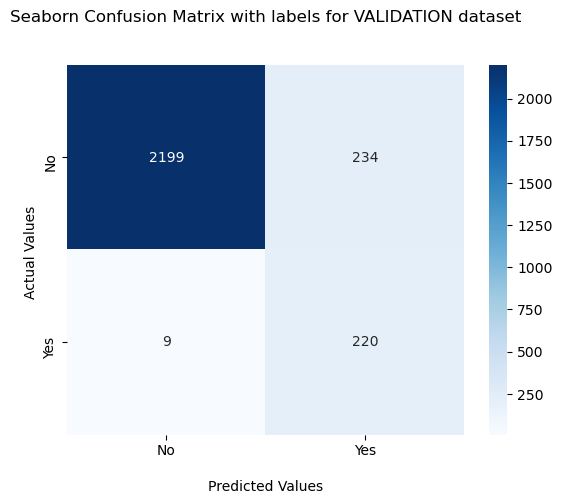

In [11]:
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator=classTree)
adaboost.fit(X_train, y_train)
confusionMatrices(adaboost, 'Boosted decision tree')

### Random Forest

Random forest - training results
Accuracy Score:  0.843
F1 Score:  0.844


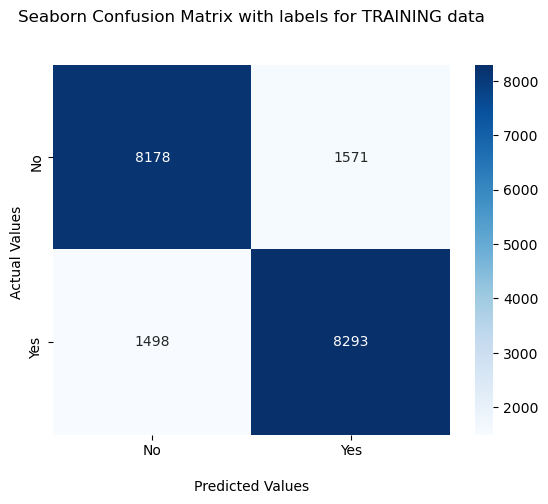

Random forest - Test results
Accuracy Score:  0.849
F1 Score:  0.847


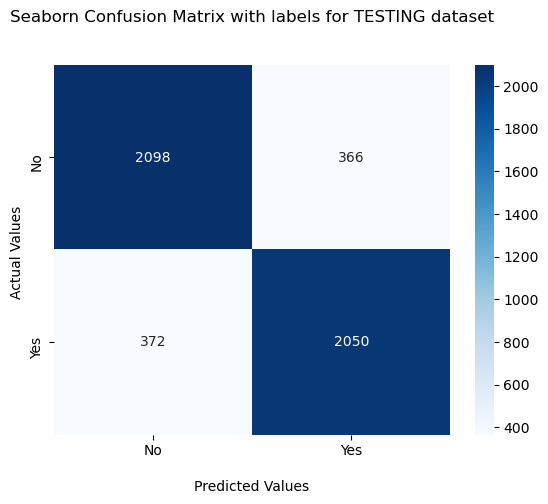

Random forest - Test results
Accuracy Score:  0.846
F1 Score:  0.493


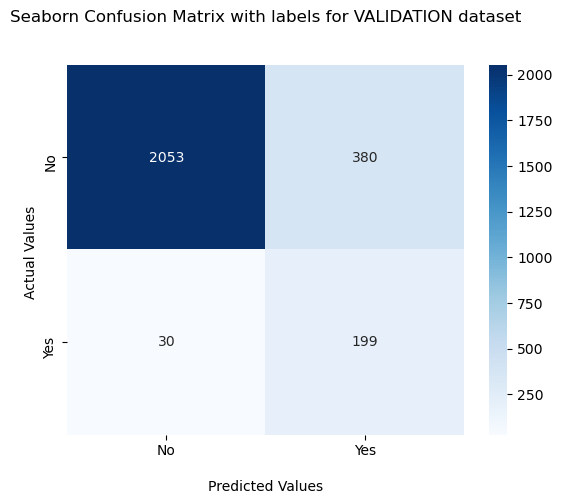

In [12]:
rfModel = RandomForestClassifier(max_features=3, min_samples_split=300, 
                                 random_state=0, n_estimators=100, criterion='entropy')
rfModel.fit(X_train, y_train)
confusionMatrices(rfModel, 'Random forest')

### Linear Discriminant Analysis

Linear discriminant analysis - training results
Accuracy Score:  0.825
F1 Score:  0.825


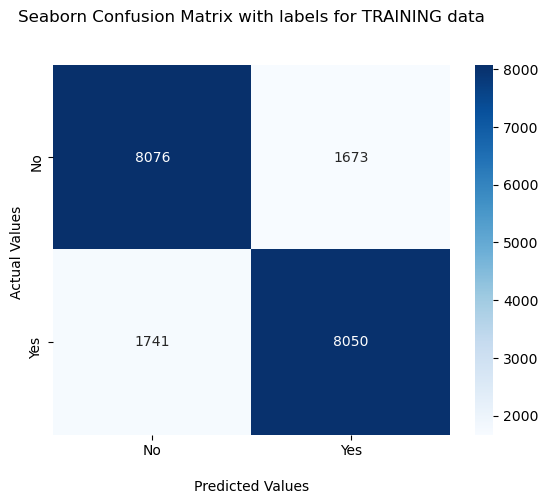

Linear discriminant analysis - Test results
Accuracy Score:  0.832
F1 Score:  0.829


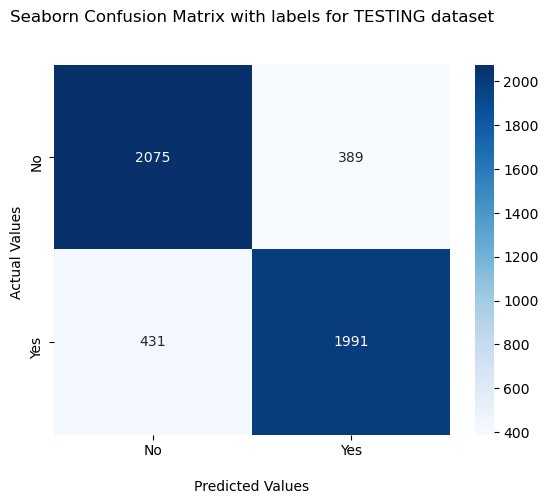

Linear discriminant analysis - Test results
Accuracy Score:  0.835
F1 Score:  0.473


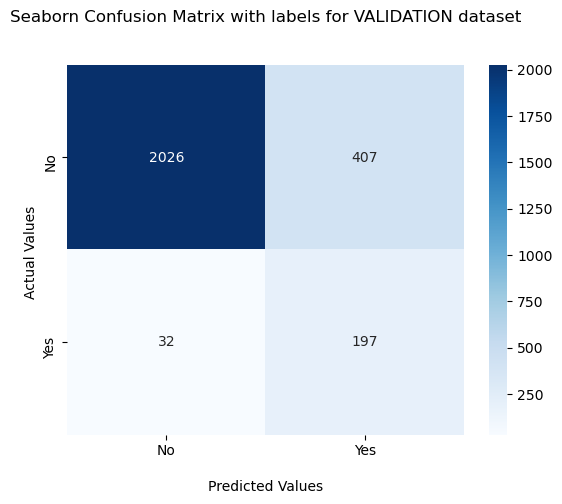

In [13]:
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X_train, y_train)
confusionMatrices(ldaModel, 'Linear discriminant analysis')

### Neural Network

Neural Network - training results
Accuracy Score:  0.838
F1 Score:  0.838


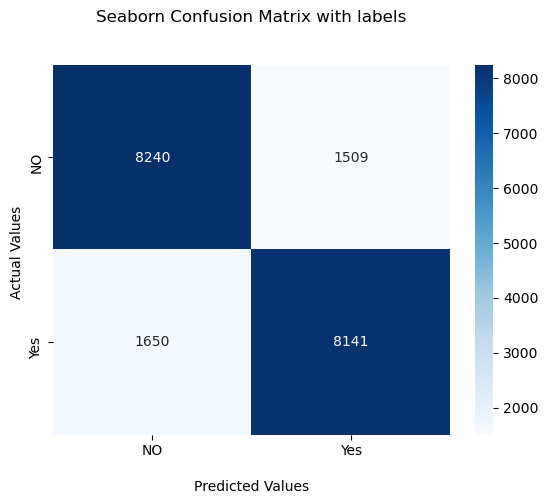

Neural Network - Test results
Accuracy Score:  0.841
F1 Score:  0.838


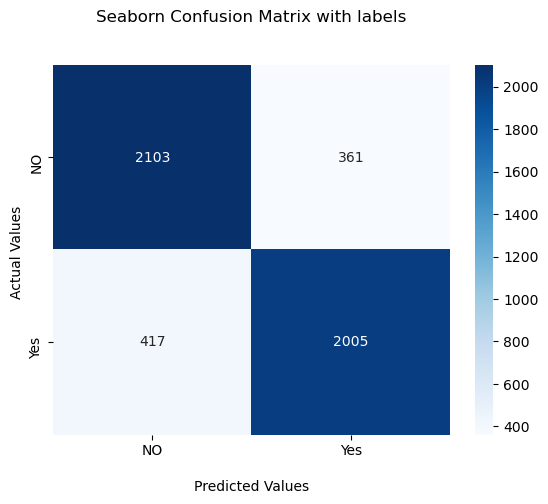

Neural Network - Validation results
Accuracy Score:  0.852
F1 Score:  0.498


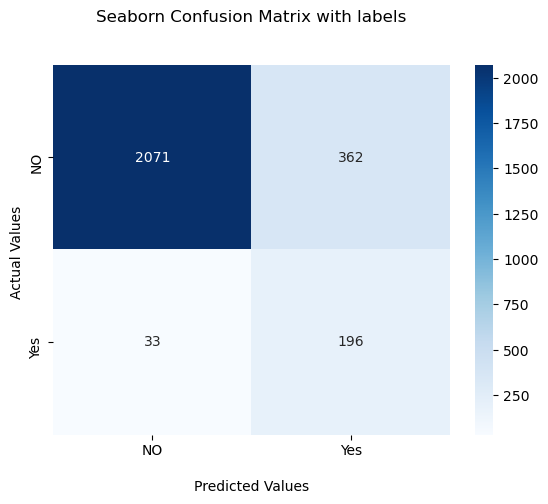

In [17]:
scaleInput = MinMaxScaler()
scaleInput.fit(X_train * 1.0)

neuralNet = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', solver='lbfgs', max_iter=3000, 
                          random_state=1)
neuralNet.fit(scaleInput.transform(X_train), y_train)

print('Neural Network - training results')
#classificationSummary(y_train, neuralNet.predict(scaleInput.transform(X_train)))
y_pred_train = neuralNet.predict(scaleInput.transform(X_train))
neuralNetMatTr = (confusion_matrix(y_train, y_pred_train))

acc = metrics.accuracy_score(y_train, y_pred_train)
f1 = metrics.f1_score(y_train, y_pred_train)

print("Accuracy Score: ",round(acc,3))
print("F1 Score: ",round(f1,3))

ax = sns.heatmap(neuralNetMatTr, annot=True, fmt="d", cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NO','Yes'])
ax.yaxis.set_ticklabels(['NO','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('Neural Network - Test results')
#classificationSummary(y_test, neuralNet.predict(scaleInput.transform(X_test)))
y_pred = neuralNet.predict(scaleInput.transform(X_test))
neuralNetMat = (confusion_matrix(y_test, y_pred))

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy Score: ",round(acc,3))
print("F1 Score: ",round(f1,3))


ax = sns.heatmap(neuralNetMat, annot=True, fmt="d", cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NO','Yes'])
ax.yaxis.set_ticklabels(['NO','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('Neural Network - Validation results')
#classificationSummary(y_test, neuralNet.predict(scaleInput.transform(X_test)))
y_pred = neuralNet.predict(scaleInput.transform(X_valid))
neuralNetMat = (confusion_matrix(y_valid, y_pred))

acc = metrics.accuracy_score(y_valid, y_pred)
f1 = metrics.f1_score(y_valid, y_pred)

print("Accuracy Score: ",round(acc,3))
print("F1 Score: ",round(f1,3))


ax = sns.heatmap(neuralNetMat, annot=True, fmt="d", cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NO','Yes'])
ax.yaxis.set_ticklabels(['NO','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Lift Chart - All Models

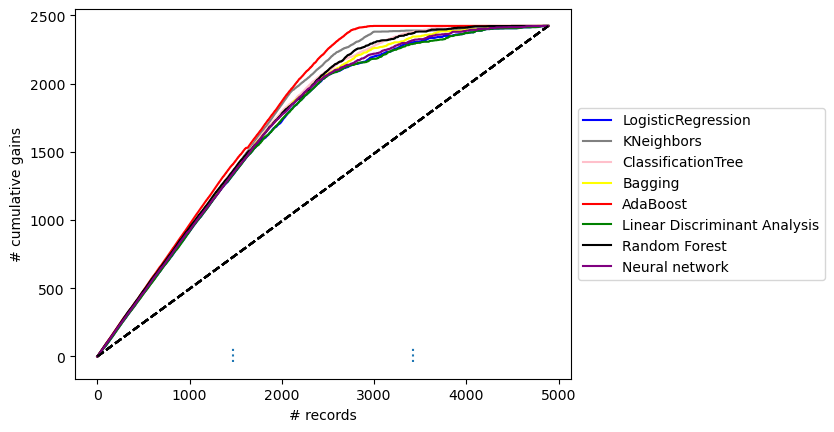

In [18]:
def addLiftChart(predict_proba, label, ax=None, color="blue"):
    df = pd.DataFrame(data={'prob': [p[1] for p in predict_proba], 'actual': y_test})
    df = df.sort_values(by=['prob'], ascending=False)
    ax = gainsChart(df.actual, ax=ax, label=label, color=color)
    return ax

ax = addLiftChart(logit_reg.predict_proba(X_test), 'LogisticRegression')
addLiftChart(KNeighbors.predict_proba(X_test), 'KNeighbors', ax=ax, color='gray')
addLiftChart(classTree.predict_proba(X_test), 'ClassificationTree', ax=ax, color='pink')
addLiftChart(bagging.predict_proba(X_test), 'Bagging', ax=ax, color='yellow')
addLiftChart(adaboost.predict_proba(X_test), 'AdaBoost', ax=ax, color='red')
addLiftChart(ldaModel.predict_proba(X_test), 'Linear Discriminant Analysis', ax=ax, color='green')
addLiftChart(rfModel.predict_proba(X_test), 'Random Forest', ax=ax, color='black')
addLiftChart(neuralNet.predict_proba(scaleInput.transform(X_test)), 'Neural network', ax=ax, color='purple')

ax.vlines(x=[len(y_test) * 0.3, len(y_test) * 0.7], ymin=-40, ymax=80, linestyles='dotted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Boosted decision tree - training results
Accuracy Score:  0.921
F1 Score:  0.923


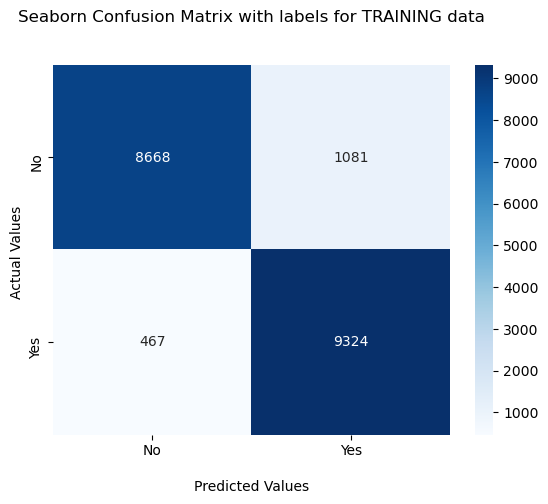

Boosted decision tree - Test results
Accuracy Score:  0.904
F1 Score:  0.907


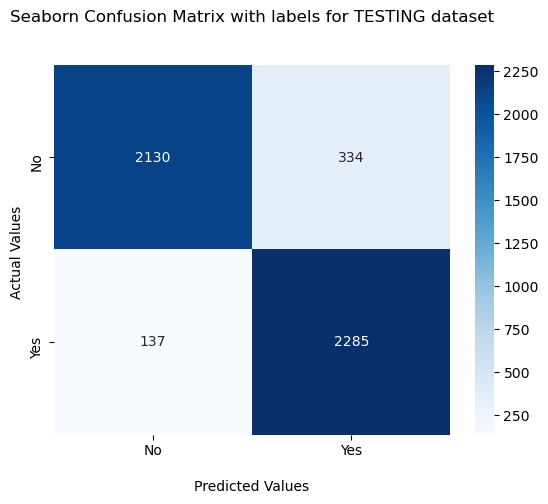

Boosted decision tree - Test results
Accuracy Score:  0.891
F1 Score:  0.601


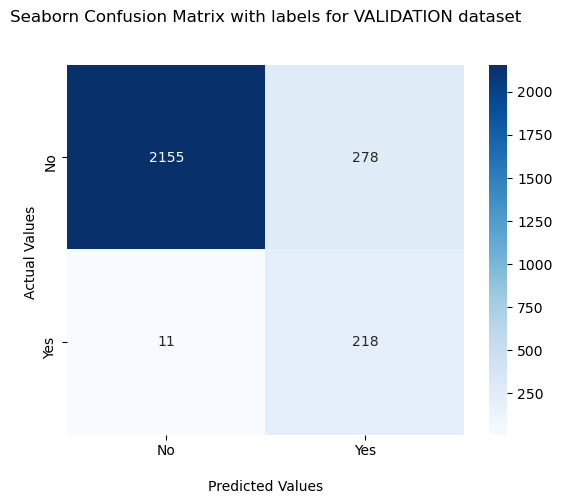

In [19]:
adaboost = AdaBoostClassifier(n_estimators=10, base_estimator=classTree)
adaboost.fit(X_train, y_train)
confusionMatrices(adaboost, 'Boosted decision tree')

Boosted decision tree - training results
Accuracy Score:  0.938
F1 Score:  0.94


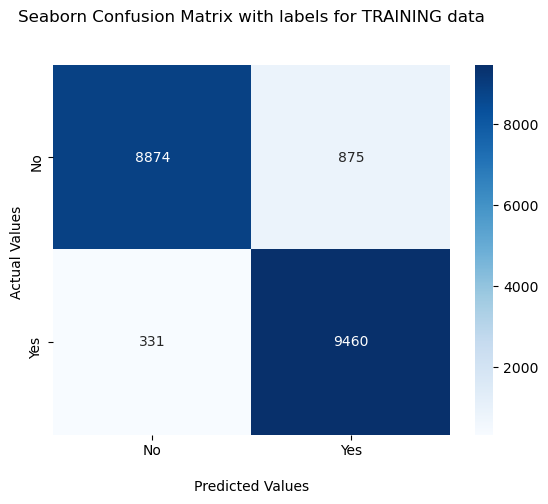

Boosted decision tree - Test results
Accuracy Score:  0.922
F1 Score:  0.924


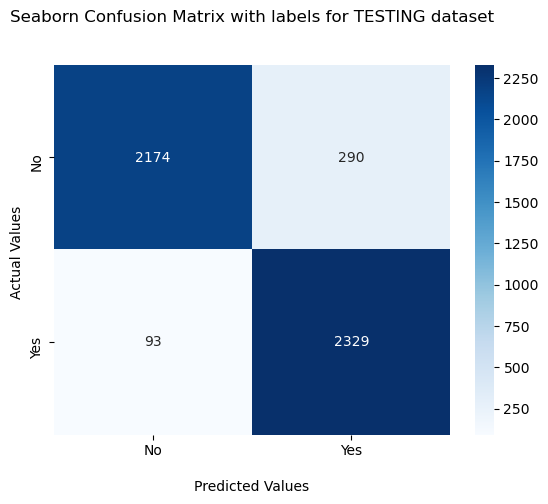

Boosted decision tree - Test results
Accuracy Score:  0.912
F1 Score:  0.653


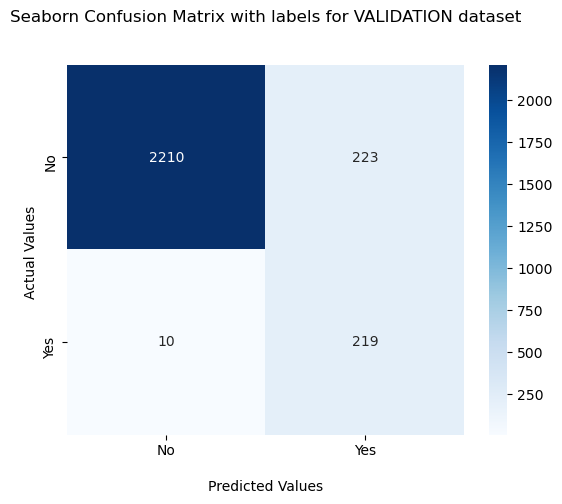

In [20]:
adaboost = AdaBoostClassifier(n_estimators=500, base_estimator=classTree)
adaboost.fit(X_train, y_train)
confusionMatrices(adaboost, 'Boosted decision tree')

Boosted decision tree - training results
Accuracy Score:  0.938
F1 Score:  0.94


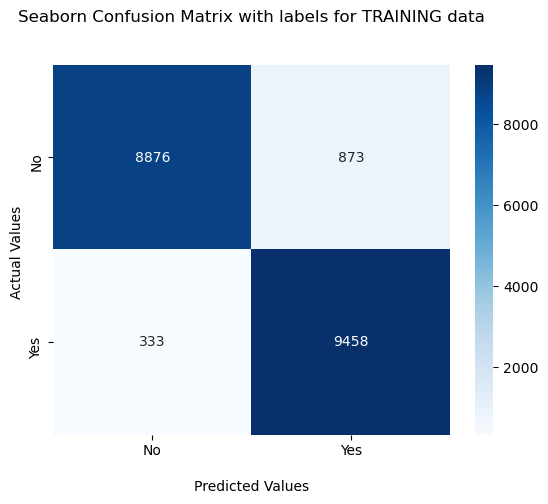

Boosted decision tree - Test results
Accuracy Score:  0.921
F1 Score:  0.924


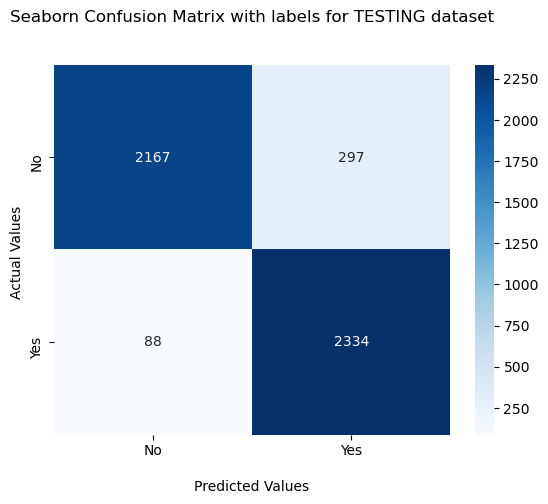

Boosted decision tree - Test results
Accuracy Score:  0.91
F1 Score:  0.647


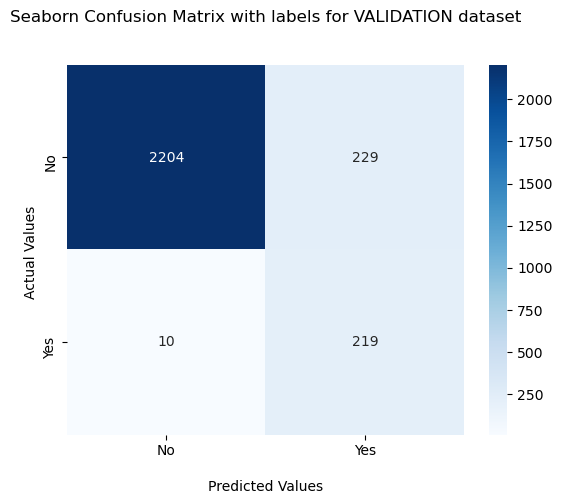

In [21]:
adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=classTree)
adaboost.fit(X_train, y_train)
confusionMatrices(adaboost, 'Boosted decision tree')

Boosted decision tree - training results
Accuracy Score:  0.938
F1 Score:  0.94


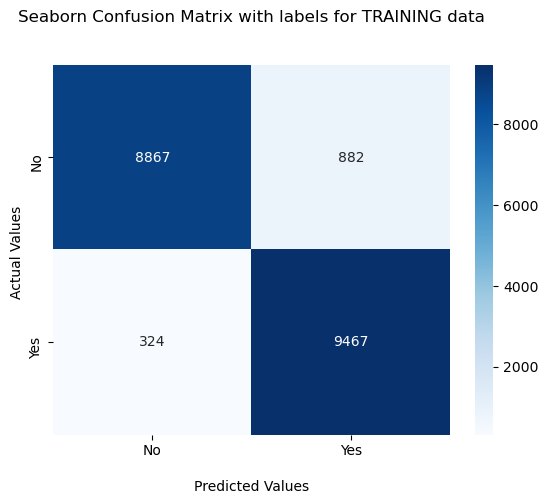

Boosted decision tree - Test results
Accuracy Score:  0.92
F1 Score:  0.923


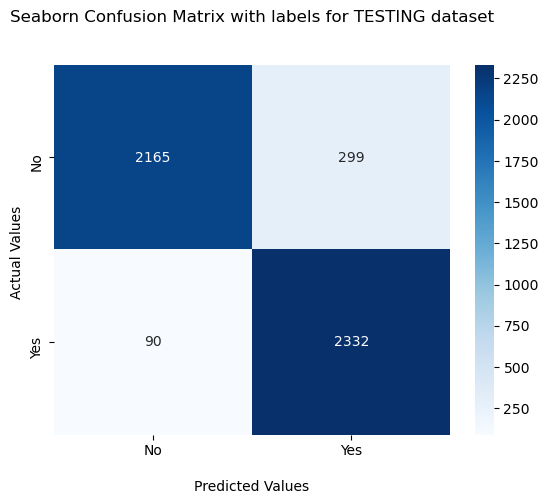

Boosted decision tree - Test results
Accuracy Score:  0.91
F1 Score:  0.647


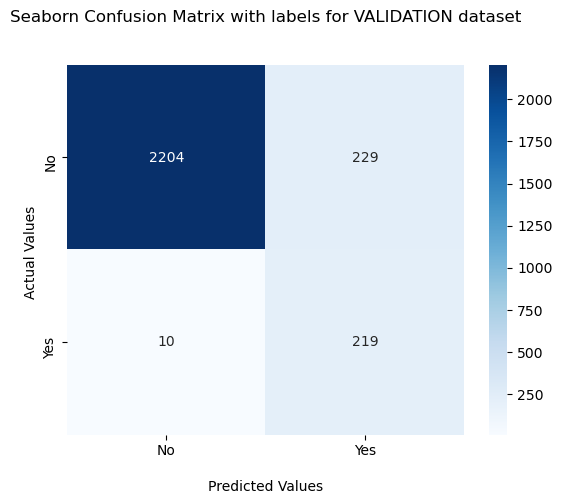

In [22]:
adaboost = AdaBoostClassifier(n_estimators=5000, base_estimator=classTree)
adaboost.fit(X_train, y_train)
confusionMatrices(adaboost, 'Boosted decision tree')